# 4 peaks problem

In [40]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
seed = 42
np.random.seed(seed)

In [41]:
def run_algorithm(algorithm, problem, algorithm_name, random_seed,max_attempts=200,max_iters=100):
    start_time = time.time()
    if algorithm_name == "RHC":
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_seed)
    elif algorithm_name == "SA":
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_seed)
    elif algorithm_name == "GA":
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_seed)
    elif algorithm_name == "MIMIC":
        best_state, best_fitness, fitness_curve = mlrose.mimic(
            problem, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_seed, pop_size=300, keep_pct=0.2)
  
    
    end_time = time.time()
    time_taken = end_time - start_time
    function_evals = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evals, time_taken

In [42]:
# Test different problem sizes
problem_sizes = [20, 40, 60, 80]
results = {"RHC": [], "SA": [], "GA": [], "MIMIC": []}
fitness_iteration = {"RHC": [], "SA": [], "GA": [], "MIMIC": []}
function_evals = {"RHC": [], "SA": [], "GA": [], "MIMIC": []}
wall_clock_times = {"RHC": [], "SA": [], "GA": [], "MIMIC": []}

In [43]:
for size in problem_sizes:
    # Define the fitness function
    fitness = mlrose.FourPeaks(t_pct=0.2)
    
    # Define the optimization problem
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
    
    for algo in ["RHC", "SA", "GA", "MIMIC"]:
        fitness, curve, evals, time_taken = run_algorithm(algo, problem, algo, seed)
        results[algo].append(fitness)
        fitness_iteration[algo].append(curve)
        function_evals[algo].append(evals)
        wall_clock_times[algo].append(time_taken)


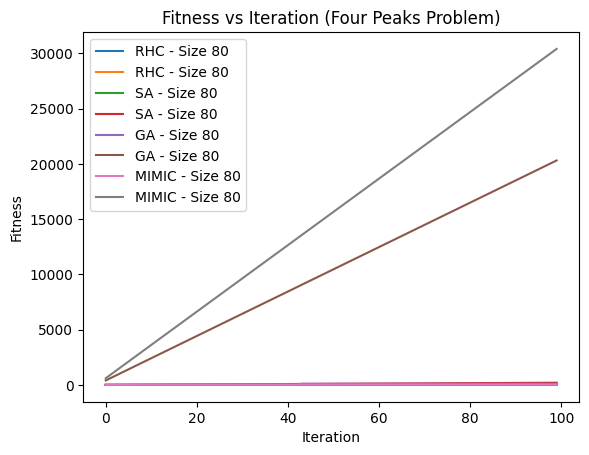

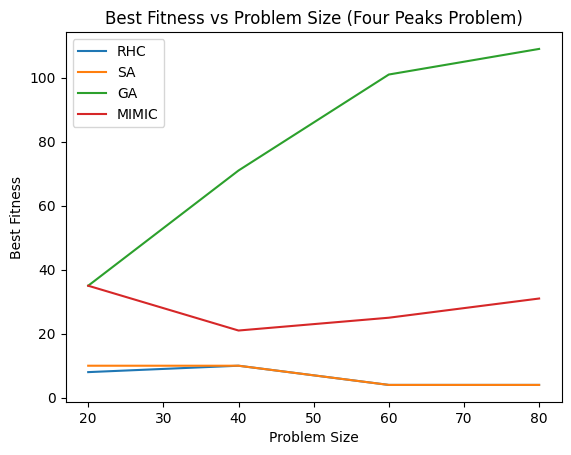

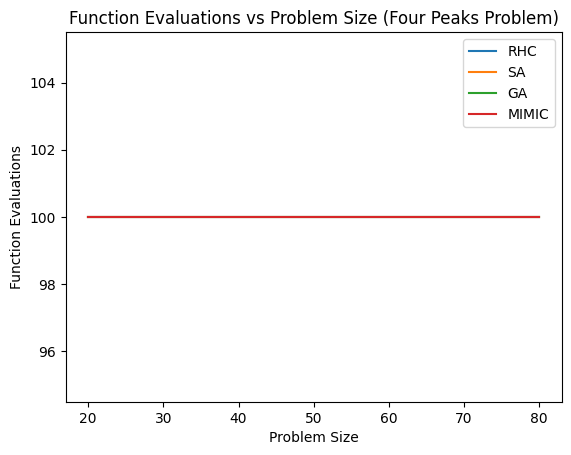

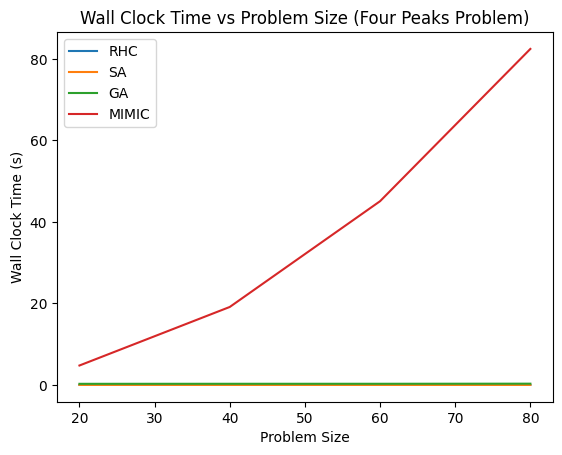

In [44]:

# Plot Fitness vs Iteration
plt.figure()
for algo in fitness_iteration:
    for i, size in enumerate(problem_sizes):
        if size == 80:
            plt.plot(fitness_iteration[algo][i], label=f'{algo} - Size {size}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness vs Iteration (Four Peaks Problem)')
plt.legend()
plt.show()

# Plot Fitness vs Problem Size
plt.figure()
for algo in results:
    plt.plot(problem_sizes, results[algo], label=algo)
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Best Fitness vs Problem Size (Four Peaks Problem)')
plt.legend()
plt.show()

# Plot Function Evaluations vs Problem Size
plt.figure()
for algo in function_evals:
    plt.plot(problem_sizes, function_evals[algo], label=algo)
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations vs Problem Size (Four Peaks Problem)')
plt.legend()
plt.show()

# Plot Wall Clock Time vs Problem Size
plt.figure()
for algo in wall_clock_times:
    plt.plot(problem_sizes, wall_clock_times[algo], label=algo)
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time vs Problem Size (Four Peaks Problem)')
plt.legend()
plt.show()

